In [26]:
from matplotlib import pyplot as plt
from matplotlib import animation
from numpy import sin, cos, pi
from scipy.integrate import odeint
from IPython.display import HTML

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

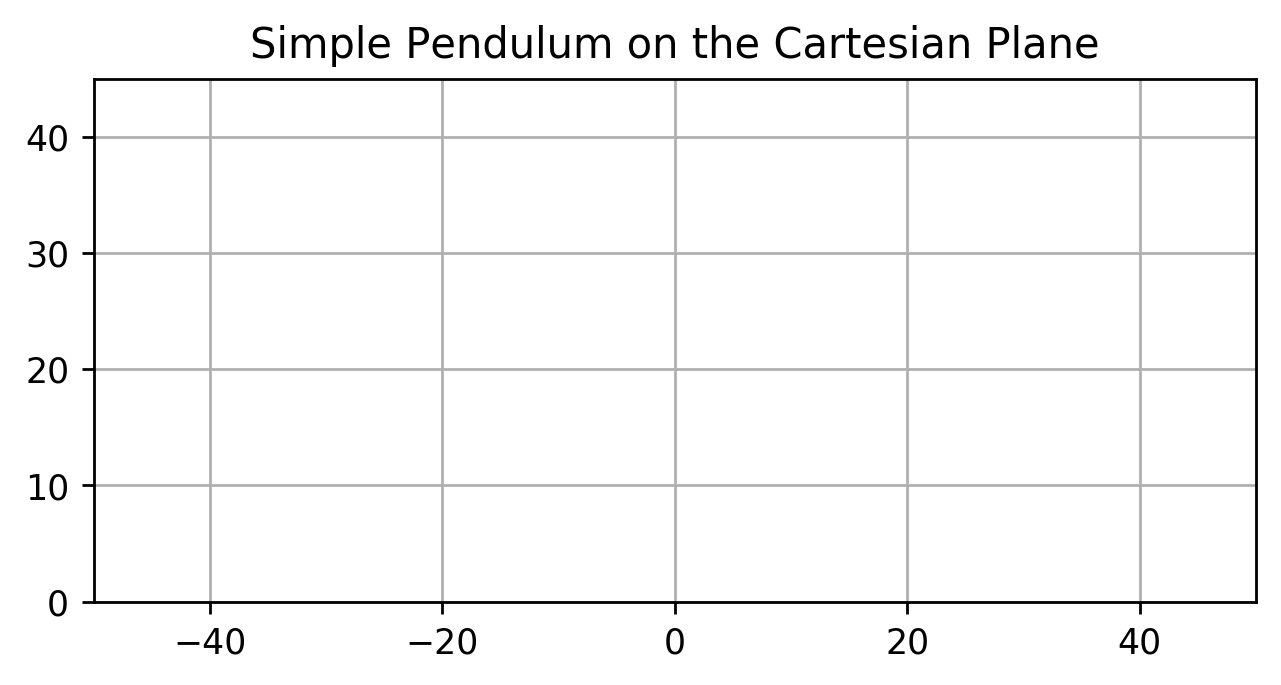

In [30]:
def simple_pendulum_ode(conditions, t, ℓ=10, g=980):
    # state of θ and ω is in the conditions list
    θ, ω = conditions
    
    dydt = [ω, -g/ℓ*np.sin(θ)]
    return dydt

θ_inital = pi/2 - 0.1
ω_inital = 0.0

t_list = np.linspace(0, 1, 300)

ℓ = 10

solutions = odeint(simple_pendulum_ode, [θ_inital, ω_inital], t_list)
# odeint solves for θ and ω over the interval in t_list, it pases conditions = [θ_inital, ω_inital] 
# for the first call of simple_pendulum_ode().

θ_solution_list = [i[0] for i in solutions]

x_0 = 0
y_0 = 40

y_list = [y_0 - ℓ*cos(θ) for θ in θ_solution_list]
x_list = [ℓ*sin(θ) for θ in θ_solution_list]

fig = plt.figure()


ax = fig.add_subplot(111, aspect='equal', autoscale_on=False,
                     xlim=(-50, 50), ylim=(0, 45))
plt.grid()

plt.title('Simple Pendulum on the Cartesian Plane')

lines = []

for i in range(len(solutions)):
    line = plt.plot([x_0, x_list[i]], [y_0, y_list[i]], color='k', lw=2)
    
    lines.append(line)


ani = animation.ArtistAnimation(fig, lines, interval=30)

HTML(ani.to_html5_video())